In [4]:
import pandas as pd

df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')

df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [20]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [21]:
# STEP 1: Drop rows where booking_complete is missing (to be safe)
df = df.dropna(subset=['booking_complete'])

# STEP 2: Define target and features
y = df['booking_complete']
X = df.drop('booking_complete', axis=1)

# STEP 3: Encode all object (string) columns
categorical_cols = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# STEP 4: Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[8365  139]
 [1318  178]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.56      0.12      0.20      1496

    accuracy                           0.85     10000
   macro avg       0.71      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000



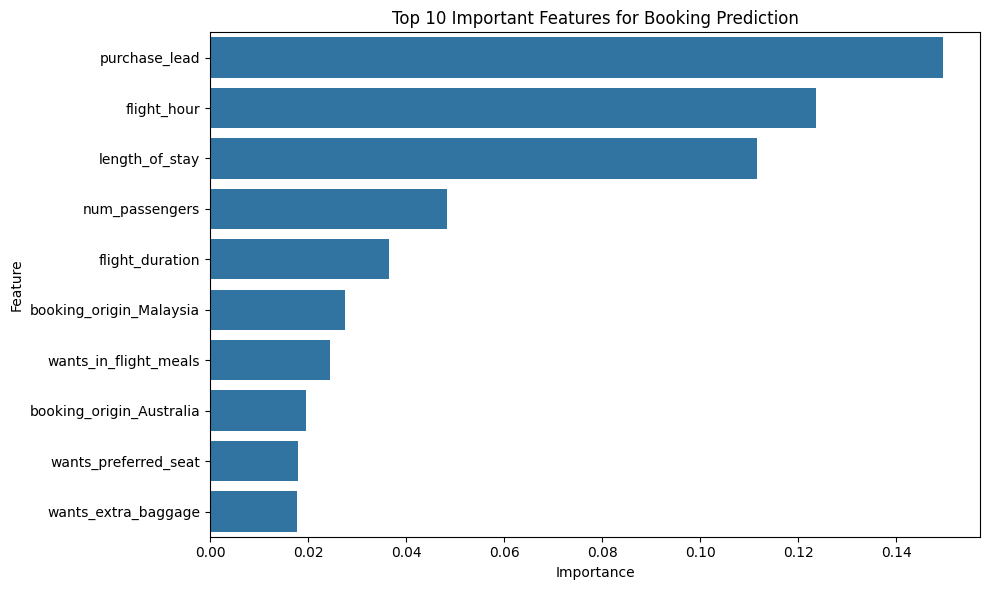

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
features = X_encoded.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Important Features for Booking Prediction')
plt.tight_layout()
plt.show()
